# Regressing 2D Data with a Two-Layer Neural Network

This notebook provides you with a complete code example that
loads the data in `data_reg_2d_linear.csv`, trains a two-layer dense neural network to fit them, and finally uses the trained network to predict the values of the data in `data_reg_2d_linear_test.csv`.

## Loading and Plotting the Data

In [11]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_linear.csv")

print("x:", x)
print("y_gt:", y_gt)
print(len(x))
print(len(y_gt))

x: [[-0.01264992 -0.85443355]
 [ 0.76032383 -0.97434942]
 [ 0.01950686  0.27497154]
 [-1.58945469 -1.54899742]
 [-0.4683091   0.04368673]
 [-0.07725676  0.35296562]
 [-0.88869315  0.9471676 ]
 [-0.28959776 -0.32629691]
 [-0.3686084   0.77991726]
 [-0.01630287  0.69537186]
 [ 1.04251786  0.30325747]
 [-1.02762036  0.28614963]
 [ 1.35221365  0.00522689]
 [ 1.11043191  0.06395982]
 [ 0.20114065 -0.72740412]
 [-0.5236721   1.02450951]
 [-0.74496852  0.76759749]
 [-0.34330278  1.47764927]
 [-1.48967134  0.66148164]
 [ 0.91347373  0.20379262]
 [-1.04925868 -0.70112109]
 [ 1.47620376  0.38821102]
 [ 0.16479918 -0.08658965]
 [-0.88185459 -0.33227438]
 [-0.08707602 -0.18477628]
 [ 1.34159875  1.94937676]
 [-0.32110135  1.54589904]
 [ 2.40018166 -0.03238685]
 [-1.00355408  0.07884853]
 [ 0.48644429  0.64149119]
 [ 0.49777571 -0.98064575]
 [ 0.96754236  1.76567471]
 [-1.05642191 -1.36633827]
 [ 1.00046248  0.80779301]
 [ 0.48090259  1.32363817]
 [-0.93721223 -1.31488225]
 [-0.7783187  -1.1272839 

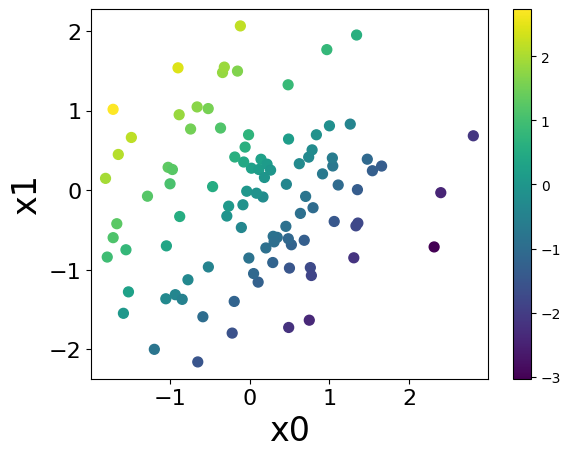

In [12]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Dense Neural Network

Implement the sigmoidal activation function ...

In [13]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [14]:
def dnn2_reg(wa, wb, x):
    """Two-layer dense neural network for classification."""
    return sigmoid(x @ wa) @ wb

... define the number of neurons in the first layer ...

In [15]:
num_neurons = 3

... randomly initialize its weights ...

In [16]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons))  # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1))  # Input weights layer 2.


... obtain its predictions for the input data ...

In [17]:
y_p = dnn2_reg(wa, wb, x)

... and plot its predictions.

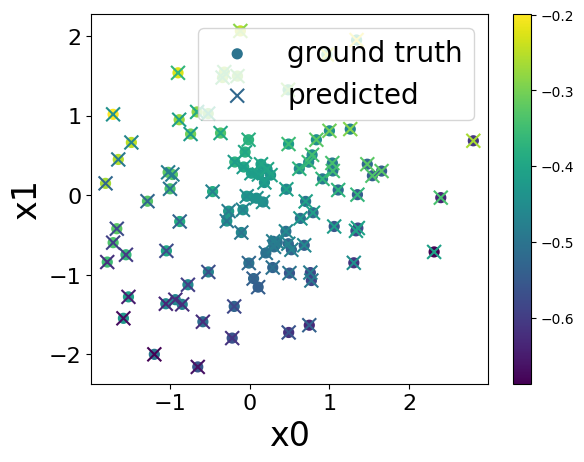

In [18]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Training with the Backpropagation Algorithm

Implement the first derivative of the sigmoid function ...

In [20]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm ...

In [21]:
from numpy import reshape, sum, transpose

num_samples = len(x)
num_train_iterations = 10 ** 5
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples)  # Select random sample.
    x_selected = reshape(x[selected], (1, -1))
    y_gt_selected = reshape(y_gt[selected], (1, -1))

    # Detailed neural network calculation.
    x_selected_a = x_selected  # Input layer 1.
    p_a = x_selected_a @ wa  # Activation potential layer 1.
    y_selected_a = sigmoid(p_a)  # Output layer 1.

    x_selected_b = y_selected_a  # Input layer 2.
    p_b = x_selected_b @ wb  # Activation potential layer 2.
    y_selected_b = p_b  # Output neuron layer 2 (output neuron).

    y_p_selected = y_selected_b
    # Update weights.
    error = y_p_selected - y_gt_selected  # Calculate error.

    delta_b = error * 1
    wb = wb - eta * delta_b * transpose(x_selected_b)

    delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
    wa = wa - eta * delta_a * transpose(x_selected_a)

    if i % 100 == 0:
        print(f"{i} y_p={y_p_selected[0, 0]:.2f} error = {error[0, 0]:.2f}")

0 y_p=-0.41 error = 0.61
100 y_p=-0.76 error = 0.54
200 y_p=-1.84 error = 0.54
300 y_p=0.04 error = 0.01
400 y_p=-1.16 error = -0.11
500 y_p=-1.17 error = -0.08
600 y_p=0.79 error = 0.18
700 y_p=-1.52 error = 0.05
800 y_p=-0.31 error = 0.00
900 y_p=-1.35 error = -0.04
1000 y_p=0.51 error = 0.08
1100 y_p=2.34 error = -0.40
1200 y_p=2.18 error = -0.26
1300 y_p=0.82 error = 0.11
1400 y_p=0.70 error = 0.10
1500 y_p=-2.12 error = 0.27
1600 y_p=-0.94 error = -0.07
1700 y_p=-1.09 error = -0.15
1800 y_p=0.21 error = 0.06
1900 y_p=0.69 error = 0.09
2000 y_p=-0.39 error = -0.10
2100 y_p=1.84 error = 0.01
2200 y_p=1.65 error = 0.00
2300 y_p=-0.39 error = -0.03
2400 y_p=-1.47 error = -0.01
2500 y_p=-0.39 error = -0.08
2600 y_p=0.21 error = 0.06
2700 y_p=-1.78 error = -0.00
2800 y_p=-1.25 error = -0.05
2900 y_p=-0.01 error = 0.00
3000 y_p=2.01 error = -0.10
3100 y_p=1.32 error = 0.08
3200 y_p=-1.12 error = -0.02
3300 y_p=-1.10 error = -0.10
3400 y_p=0.18 error = 0.03
3500 y_p=0.83 error = 0.12
3600

... and plot its predictions.

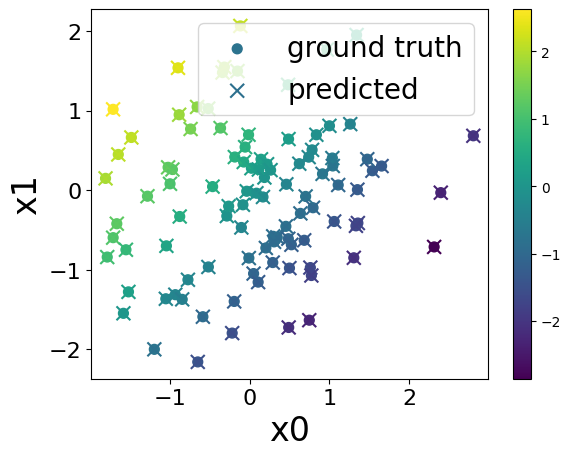

In [22]:
plot_pred_2d(x, y_gt, y_p=dnn2_reg(wa, wb, x))

## Testing the Performance of the Trained Neural Network

Check how the trained neuron works on the test data.

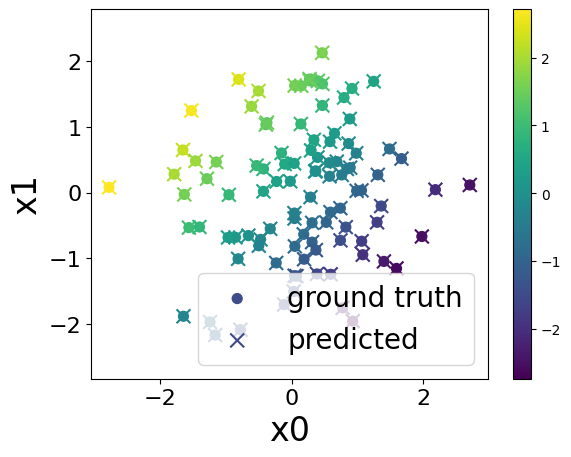

In [23]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_linear_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=dnn2_reg(wa, wb, x_test))